In [ ]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA


# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
location = r"E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\iris.csv"

In [ ]:
# read the dataset
df = pd.read_csv(location  )

df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# split data table into data X and class labels y

X_iris = df.iloc[:,0:4].values
y_iris = df.iloc[:,4].values

In [ ]:
label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}


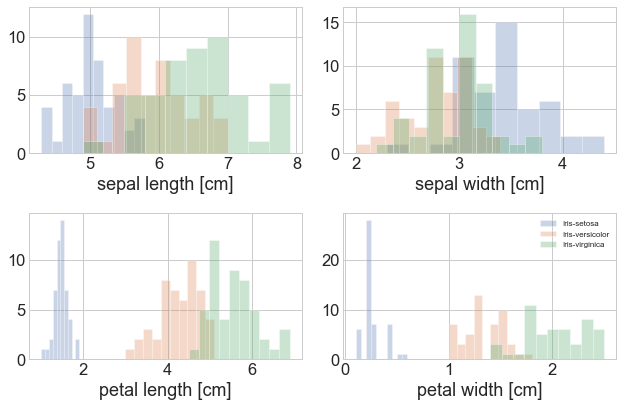

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))

    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)

        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X_iris[y_iris==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()

# Eigendecomposition - Computing Eigenvectors and Eigenvalues

#### Standardizing

In [ ]:
# Whether to standardize the data prior to a PCA on the covariance matrix
# depends on the measurement scales of the original features.

# Since PCA yields a feature subspace that maximizes the variance along
# the axes, it makes sense to standardize the data,
# especially, if it was measured on different scales.

# Although, all features in the Iris dataset were measured in centimeters,
# let us continue with the transformation of the data onto unit scale
# (mean=0 and variance=1), which is a requirement for the optimal
# performance of many machine learning algorithms.

X_iris_std = StandardScaler().fit_transform(X_iris)

The eigenvectors and eigenvalues of a covariance (or correlation) matrix
represent the “core” of a PCA

The eigenvectors (principal components) determine the directions of the
new feature space, and the eigenvalues determine their magnitude.

In other words, the __eigenvalues explain the variance__ of the data along
the new feature axes.

#### understanding transpose of matrix

In [ ]:
x = np.arange(15).reshape((5,3))

In [ ]:
x

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [ ]:
np.transpose(x)

array([[ 0,  3,  6,  9, 12],
       [ 1,  4,  7, 10, 13],
       [ 2,  5,  8, 11, 14]])

In [ ]:
np.transpose(x).shape

(3, 5)

#### back to the iris example ...

In [ ]:
# no of samples in the X array
len(X_iris_std)

150

In [ ]:
# first 5 samples, all 4 columns
print(X_iris_std[:5])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


- compute the transpose matrix of X_std
- the transpose will result in matrix of  number of features x samples size

In this case, 150x4 matrix will transform into 4x150

In [ ]:
X_iris_std_T = X_iris_std.T

In [ ]:
X_iris_std_T.shape

(4, 150)

In [ ]:
# print first 2 array elements of transposed array
print(X_iris_std_T[:2])

[[-0.90068117 -1.14301691 -1.38535265 -1.50652052 -1.02184904 -0.53717756
  -1.50652052 -1.02184904 -1.74885626 -1.14301691 -0.53717756 -1.26418478
  -1.26418478 -1.87002413 -0.05250608 -0.17367395 -0.53717756 -0.90068117
  -0.17367395 -0.90068117 -0.53717756 -0.90068117 -1.50652052 -0.90068117
  -1.26418478 -1.02184904 -1.02184904 -0.7795133  -0.7795133  -1.38535265
  -1.26418478 -0.53717756 -0.7795133  -0.41600969 -1.14301691 -1.02184904
  -0.41600969 -1.14301691 -1.74885626 -0.90068117 -1.02184904 -1.62768839
  -1.74885626 -1.02184904 -0.90068117 -1.26418478 -0.90068117 -1.50652052
  -0.65834543 -1.02184904  1.40150837  0.67450115  1.2803405  -0.41600969
   0.79566902 -0.17367395  0.55333328 -1.14301691  0.91683689 -0.7795133
  -1.02184904  0.06866179  0.18982966  0.31099753 -0.29484182  1.03800476
  -0.29484182 -0.05250608  0.4321654  -0.29484182  0.06866179  0.31099753
   0.55333328  0.31099753  0.67450115  0.91683689  1.15917263  1.03800476
   0.18982966 -0.17367395 -0.41600969 -

#### covariance
Consider two variables, x_0 and x_1, which correlate perfectly,
but in opposite directions

In [ ]:
np.array([[0, 2], [1, 1], [2, 0]])

array([[0, 2],
       [1, 1],
       [2, 0]])

In [ ]:
np.array([[0, 2], [1, 1], [2, 0]]).T

array([[0, 1, 2],
       [2, 1, 0]])

In [ ]:
x = np.array([[0, 2], [1, 1], [2, 0]]).T
x

array([[0, 1, 2],
       [2, 1, 0]])

In [ ]:
np.cov(x)

array([[ 1., -1.],
       [-1.,  1.]])

In [ ]:
x1 = [-2.1, -1,  4.3]
x2 = [3,  1.1,  0.12]

In [ ]:
# axis = 0 , row wise
X = np.stack((x1, x2), axis=0)
X

array([[-2.1 , -1.  ,  4.3 ],
       [ 3.  ,  1.1 ,  0.12]])

In [ ]:
np.cov(X)

array([[11.71      , -4.286     ],
       [-4.286     ,  2.14413333]])

In [ ]:
np.cov(x1, x2)

array([[11.71      , -4.286     ],
       [-4.286     ,  2.14413333]])

In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
# Normal distributed x and y vector with mean 0 and standard deviation 1
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)

In [ ]:
X = np.vstack((x, y))
X

array([[ 5.53807544e-02,  2.04138735e+00,  8.89020281e-01,
         7.26463015e-01,  7.28825278e-01, -5.82373494e-01,
        -1.08965325e+00, -2.82939883e-01,  5.98164250e-01,
        -1.70038601e+00, -3.74080625e-01,  1.65375506e-01,
        -4.60711720e-01, -1.70399387e+00, -6.08668742e-01,
         2.08792054e-01,  1.03829111e+00, -6.21063236e-02,
        -3.68435228e-01,  6.49769150e-01, -3.79936760e-01,
         6.03296289e-01, -1.91043463e-01,  6.74462049e-02,
        -1.38549779e+00, -1.86587931e+00,  8.92837038e-02,
         5.10931736e-01,  3.61571892e-01,  6.01557715e-01,
        -2.43728634e-01,  1.49641723e+00,  6.35657956e-01,
         1.20308110e+00, -5.17572147e-01, -4.32861986e-01,
        -2.99895997e-01,  4.72201950e-01, -4.22731777e-01,
        -1.96684818e-01,  1.17706552e+00, -9.29227689e-01,
        -2.55469462e+00,  3.58759494e-01, -1.66332917e+00,
         1.98795086e+00, -8.76768069e-01, -1.38772440e+00,
         1.64575522e-01, -2.63600296e-03,  5.41222026e-0

In [ ]:
X_std = StandardScaler().fit_transform(X)

In [ ]:
X_T = np.vstack((x, y)).T

In [ ]:
X_T

array([[ 5.53807544e-02,  4.02742310e-01],
       [ 2.04138735e+00, -2.92257090e-01],
       [ 8.89020281e-01,  7.05261919e-01],
       [ 7.26463015e-01, -8.17178834e-01],
       [ 7.28825278e-01, -6.70650730e-01],
       [-5.82373494e-01,  6.11903775e-01],
       [-1.08965325e+00,  1.54749793e+00],
       [-2.82939883e-01,  8.67097822e-01],
       [ 5.98164250e-01,  3.81479174e-01],
       [-1.70038601e+00, -5.11564885e-01],
       [-3.74080625e-01, -1.08390504e+00],
       [ 1.65375506e-01,  8.06526486e-01],
       [-4.60711720e-01,  3.11723352e-01],
       [-1.70399387e+00,  1.31032159e+00],
       [-6.08668742e-01,  1.89990639e-01],
       [ 2.08792054e-01,  1.64506603e-01],
       [ 1.03829111e+00,  5.23730376e-01],
       [-6.21063236e-02,  3.60751353e-01],
       [-3.68435228e-01,  1.29053377e-01],
       [ 6.49769150e-01,  1.52559104e-01],
       [-3.79936760e-01,  8.02209653e-01],
       [ 6.03296289e-01, -5.40167892e-01],
       [-1.91043463e-01,  5.00474767e-01],
       [ 6.

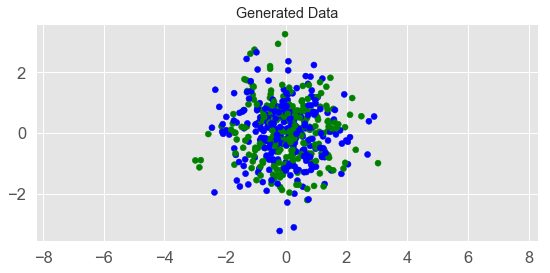

In [ ]:
plt.figure(figsize=(9, 4))
plt.scatter(X_T[:, 0], X_T[:, 1], color=['green','blue'])
plt.title('Generated Data')
plt.axis('equal');

#### This case would mean that x and y are independent (or uncorrelated)
and the covariance matrix


In [ ]:
# Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])


In [ ]:
# Calculate covariance matrix
print('COV : ', cov(x, y))

print('COV Matrix : \n', cov_mat(X_T))

# (or with np.cov(X.T))

COV :  -0.04526915107022356
COV Matrix : 
 [[ 0.06033003 -0.40530918]
 [-0.40530918  2.72294819]]


In [ ]:
# X.T
np.cov(X_std.T)

array([[ 2., -2., -2., ..., -2., -2., -2.],
       [-2.,  2.,  2., ...,  2.,  2.,  2.],
       [-2.,  2.,  2., ...,  2.,  2.,  2.],
       ...,
       [-2.,  2.,  2., ...,  2.,  2.,  2.],
       [-2.,  2.,  2., ...,  2.,  2.,  2.],
       [-2.,  2.,  2., ...,  2.,  2.,  2.]])

#### back to iris code ...
#### eigendecomposition on the covariance matrix

In [ ]:
# eigendecomposition on the covariance matrix
cov_mat = np.cov(X_iris_std_T)


In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


#### eigendecomposition on the correlation matrix
on the standardize data

In [ ]:
# Especially, in the field of “Finance,” the correlation matrix typically
# used instead of the covariance matrix.

# However, the eigendecomposition of the covariance matrix
# (if the input data was standardized) yields the same results as a
# eigendecomposition on the correlation matrix, since the correlation
# matrix can be understood as the normalized covariance matrix.

In [ ]:
# correlation matrix:

cor_mat1 = np.corrcoef(X_iris_std_T)

In [ ]:
# Eigendecomposition of the correlation matrix

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


#### Eigendecomposition of the raw data based on the correlation matrix:

In [ ]:
cor_mat2 = np.corrcoef(X_iris.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


#### We can clearly see that all three approaches yield the same
#### eigenvectors and eigenvalue pairs:

- Eigendecomposition of the covariance matrix after standardizing the data.
- Eigendecomposition of the correlation matrix after standardizing the data.
- Eigendecomposition of the correlation matrix on the raw data

In [ ]:
# Singular Vector Decomposition
# While the eigendecomposition of the covariance or correlation matrix may
# be more intuitiuve,
# most PCA implementations perform a Singular Vector Decomposition (SVD) to
# improve the computational efficiency.
# So, let us perform an SVD to confirm that the result are indeed the same:

u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.04472136, -0.08863187,  0.04870161, ...,  0.04472136,
         0.04551741,  0.04472136],
       [ 0.04472136,  0.00379406,  0.02776265, ..., -0.00191439,
         0.00402102, -0.00191439],
       [ 0.04472136,  0.03364148,  0.99702436, ..., -0.00191439,
        -0.00212664, -0.00191439],
       ...,
       [ 0.04472136,  0.00379406, -0.00208477, ...,  0.99808561,
        -0.00194846, -0.00191439],
       [ 0.04472136,  0.00976355, -0.00226294, ..., -0.00191439,
         0.9980159 , -0.00191439],
       [ 0.04472136,  0.00379406, -0.00208477, ..., -0.00191439,
        -0.00194846,  0.99808561]])

#### Selecting Principal Components

In [ ]:
# The typical goal of a PCA is to reduce the dimensionality of the original
# feature space by projecting it onto a smaller subspace,
# where the eigenvectors will form the axes.


In [ ]:
# eigenvectors only define the directions of the new axis,
# since they have all the same unit length 1,
# which can be confirmed by the following 2 lines of code:

for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

print('Everything ok!')

Everything ok!


In order to __decide which eigenvector(s) can dropped__ without losing
too much information for the construction of lower-dimensional subspace,
we need to inspect the corresponding __eigenvalues: __

The eigenvectors with the lowest eigenvalues bear the least information
about the distribution of the data; those are the ones can be dropped.

In order to do so, the common approach is to rank the eigenvalues from
highest to lowest in order choose the top k eigenvectors.

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) \
                 for i in range(len(eig_vals))]

In [ ]:
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [ ]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9108180837520528
0.9212209307072246
0.1473532783050965
0.020607707235625047


In [ ]:
# Another way
sorted(eig_vals, reverse=True)

[2.9108180837520528,
 0.9212209307072246,
 0.1473532783050965,
 0.020607707235625047]

In [ ]:
# Explained Variance
# After sorting the eigenpairs, the next question is
# “how many principal components are we going to
# choose for our new feature subspace?”

# A useful measure is the so-called “explained variance,”
# which can be calculated from the eigenvalues.

# The explained variance tells us how much information (variance) can be
# attributed to each of the principal components.

In [ ]:
tot = sum(eig_vals)

explained_variance = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

cum_explained_variance = np.cumsum(explained_variance)


In [ ]:
explained_variance

[72.77045209380132, 23.030523267680618, 3.6838319576274134, 0.5151926808906262]

In [ ]:
cum_explained_variance

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

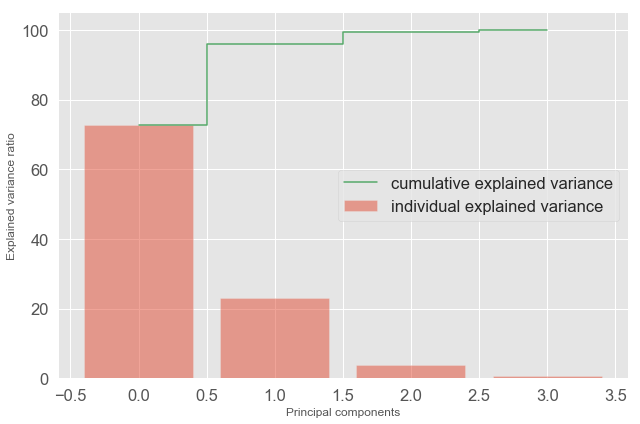

In [ ]:
plt.figure(figsize=(9, 6))

plt.bar(range(4),
        explained_variance,
        alpha=0.5,
        align='center',
        label='individual explained variance')

plt.step(range(4),
         cum_explained_variance,
         where='mid',
         color='g',
         label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

- The plot above clearly shows that most of the variance (72.77% of the variance to be precise) can be explained by the first principal component alone.

- The second principal component still bears some information (23.03%)

- while the third and fourth principal components can safely be dropped without losing to much information.

- Together, the first 2 principal components contain 95.8% of the information.

#### Projection Matrix

In [ ]:
# It’s about time to get to the really interesting part:

# The construction of the projection matrix that will be used to transform
# the Iris data onto the new feature subspace.

# basically just a matrix of the concatenated top k eigenvectors.

In [ ]:
# Here, we are reducing the 4-dimensional feature space to a 2-dimensional
# feature subspace, by choosing the “top 2” eigenvectors with the highest
# eigenvalues to construct our d×k-dimensional eigenvector matrix W.

In [ ]:
eig_pairs

[(2.9108180837520528,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.9212209307072246,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.1473532783050965,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.020607707235625047,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

In [ ]:
print(eig_pairs[0][1])
print(eig_pairs[1][1])
print(eig_pairs[2][1])
print(eig_pairs[3][1])

[ 0.52237162 -0.26335492  0.58125401  0.56561105]
[-0.37231836 -0.92555649 -0.02109478 -0.06541577]
[-0.72101681  0.24203288  0.14089226  0.6338014 ]
[ 0.26199559 -0.12413481 -0.80115427  0.52354627]


In [ ]:
eig_pairs_save = eig_pairs

In [ ]:
eig_pairs_save

[(2.9108180837520528,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.9212209307072246,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.1473532783050965,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.020607707235625047,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

In [ ]:
print(eig_pairs_save[0][1])
print(eig_pairs_save[1][1])

[ 0.52237162 -0.26335492  0.58125401  0.56561105]
[-0.37231836 -0.92555649 -0.02109478 -0.06541577]


In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [ ]:
# Projection Onto the New Feature Space

# use the 4×2-dimensional projection matrix W to transform our samples
# onto the new subspace via the equation

In [ ]:
# Y = X×W , where Y is a 150×2 matrix of our transformed samples.

# X = 150 x 4
# W = 4 x 2


In [ ]:
Y = X_iris_std.dot(matrix_w)

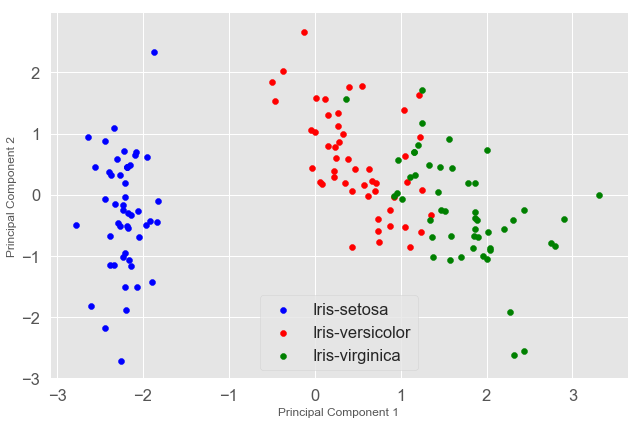

In [ ]:
plt.figure(figsize=(9, 6))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                    ('blue',        'red',             'green')):

    plt.scatter(Y[y_iris==lab, 0],
                Y[y_iris==lab, 1],
                label=lab,
                c=col)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()

#### PCA in scikit-learn
- For training/demo purposes, we went a long way to apply the PCA to the Iris dataset.

- this is already implemented insci-kit learn. !!!

In [ ]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Applying PCA

In [ ]:
# We did not specify the number of components in the constructor.
# Hence, all four of the features in the feature set will be returned for both the training and
# test sets.
pca = PCA()


In [ ]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the
# principal components.

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72226528, 0.23974795, 0.03338117, 0.0046056 ])

In [ ]:
# first principal component is responsible for 72.22% variance.
# Similarly, the second principal component causes 23.9% variance in the dataset.
# Collectively we can say that (72.22 + 23.9) 96.21% percent of the classification information
# contained in the feature set is captured by the first two principal components.

#### Let's first try to use 1 principal component to train our algorithm.

In [ ]:
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Training and Making Predictions

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy : ' ,metrics.accuracy_score(y_test, y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]
Accuracy :  0.9333333333333333


In [ ]:
# It can be seen from the output that with only one feature, the random forest algorithm is
# able to correctly predict 28 out of 30 instances,
# resulting in 93.33% accuracy.

#### Results with 2 and 3 Principal Components

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy : ' ,metrics.accuracy_score(y_test, y_pred))

[[11  0  0]
 [ 0 10  3]
 [ 0  2  4]]
Accuracy :  0.8333333333333334


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 With 2 principal components the classification accuracy decreases to 83.33% compared to
 93.33% for 1 component.

#### with 3 PC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy : ' ,metrics.accuracy_score(y_test, y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]
Accuracy :  0.9333333333333333


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy : ' ,metrics.accuracy_score(y_test, y_pred))

[[11  0  0]
 [ 0 10  3]
 [ 0  1  5]]
Accuracy :  0.8666666666666667


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
